<a href="https://colab.research.google.com/github/nosadaniel/anti_phishing_email_classifier_workflow/blob/main/prepare_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [5]:
# Install jupyter and it dependencies
%pip install -q jupyterlab ipywidgets notebook tqdm

# Install core LangChain/LangGraph/LangSmith, LLM support, and utilities
%pip install -q langgraph langchain langsmith langchain_core langchain_google_genai langchain_community langchain_ollama langchain_mistralai langchain_openai

# Install data analysis and visualization libraries
%pip install -q matplotlib seaborn plotly scikit-learn pandas numpy

# # Install some additional libraries for data processing and visualization
# %pip install requests graphviz pygraphviz

# instal datasets
%pip install -q datasets

#install the URl checking tool
%pip install -q sec-mcp

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Update sec-mcp blacklist database

In [6]:
# update the sec-mcp blacklist database
!sec-mcp update

#check sec-mcp status(optional)
!sec-mcp status

Blacklist update triggered.


2025-07-28 09:59:27,266 - sec_mcp.update_blacklist - INFO - First 5 parsed entries for OpenPhish: [('http://www.xx551001.com/', None, '2025-07-28 09:59:27', 8, 'OpenPhish'), ('https://subhash04042005.github.io/netflix-clone.github.io', None, '2025-07-28 09:59:27', 8, 'OpenPhish'), ('http://www.sdfonmdop.vercel.app/', None, '2025-07-28 09:59:27', 8, 'OpenPhish'), ('https://www.kkinstagram.com/reel/DKfBEo8xnhg/', None, '2025-07-28 09:59:27', 8, 'OpenPhish'), ('https://netzero-email-access.webflow.io/', None, '2025-07-28 09:59:27', 8, 'OpenPhish')]
2025-07-28 09:59:27,821 - sec_mcp.update_blacklist - INFO - Updated OpenPhish: 157 URLs, 141 domains, 0 IPs.
2025-07-28 09:59:34,386 - sec_mcp.update_blacklist - INFO - First 5 parsed entries for URLhaus: [('https://pastefy.app/nhqGoXpJ/raw', None, '2025-07-28 09:59:27', 8, 'URLhaus'), ('http://flowito.xyz/00101010101001/morte.arm7', None, '2025-07-28 09:59:27', 8, 'URLhaus'), ('http://flowito.xyz/00101010101001/morte.mpsl', None, '2025-07-28 0

Total entries: 143398
Last update: 0001-01-01 00:00:00
Active sources:
  - OpenPhish: 1719 entries
  - EmergingThreats: 294 entries
  - SpamhausDROP: 1581 entries
  - CINSSCORE: 28213 entries
  - Dshield: 32 entries
  - URLhaus: 17254 entries
  - BlocklistDE: 39338 entries
  - PhishTank: 54967 entries

Per-source breakdown:
Source                Domains       URLs        IPs
--------------------------------------------------
BlocklistDE                 0          0      39338
CINSSCORE                   0          0      28213
Dshield                     0          0         32
EmergingThreats             0          0        294
OpenPhish                 776        943          0
PhishTank               19505      35462          0
SpamhausDROP                0          0       1581
URLhaus                   664      16589          1

Server status: Running (STDIO)


## Load enviroment variables from .env file

In [7]:
import os
from dotenv import load_dotenv  

dotenv_path = os.path.join(os.getcwd(), '.env')
if os.path.exists(dotenv_path):
    print(f".env file found => {dotenv_path}")
    has_loaded = load_dotenv(dotenv_path)
    print(f".env file loaded: {has_loaded}")
else:
    print(".env file not found")
    exit()

# Load environment variables
google_api_key = os.environ.get('GOOGLE_API_KEY')
langsmith_endpoint = os.environ.get('LANGSMITH_ENDPOINT')
langsmith_api_key = os.environ.get('LANGSMITH_API_KEY')
langsmith_tracing = os.environ.get('LANGSMITH_TRACING')
langsmith_project = os.environ.get('LANGSMITH_PROJECT')
mistral_api_key = os.environ.get('MISTRAL_API_KEY')
llm_model = os.environ.get('LLM_MODEL')
llm_provider = os.environ.get('LLM_PROVIDER')
openrouter_api_key = os.environ.get('OPENROUTER_API_KEY')
openrouter_base_url = os.environ.get('OPENROUTER_BASE_URL')


print(llm_provider)
print(llm_model)



.env file found => d:\developer\montimage\anti_phishing_email_classifier_workflow\.env
.env file loaded: True
ollama
llama3.1:8b


## Get LLM model

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_ollama import ChatOllama
from langchain_mistralai import ChatMistralAI
from langchain_openai import ChatOpenAI

def get_llm():
  try:
    llm = None
    if llm_provider == 'gemini':
      llm = ChatGoogleGenerativeAI(
        model=llm_model, temperature=0.0)
    if llm_provider == "ollama":
      llm = ChatOllama(
        model=llm_model, temperature=0.0, base_url="http://127.0.0.1:11434")
    if llm_provider == "mistral":
      llm = ChatMistralAI(
        model=llm_model, temperature=0, max_retries=2)
    if llm_provider == "openrouter":
      llm = ChatOpenAI(
        model_name=llm_model, 
        openai_api_key=openrouter_api_key,
        openai_api_base=openrouter_base_url,
        max_tokens=8000,
        )
    if llm is None:
      raise Exception("Invalid LLM provider name")
    return llm
  except Exception as e:
    print(f"Error getting LLM: {e}")
    raise e

# example
llm = get_llm()
if llm is not None:
  print(f"LLM: {llm}")
  messages = [
                ("system", "Translate the user sentence to French."),
                ("human", "I love programming."),
            ]
  result = llm.invoke(messages)

  print(result.content)


LLM: model='llama3.1:8b' temperature=0.0 base_url='http://127.0.0.1:11434'


Failed to multipart ingest runs: langsmith.utils.LangSmithRateLimitError: Rate limit exceeded for https://api.smith.langchain.com/runs/multipart. HTTPError('429 Client Error: Too Many Requests for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Too many requests: tenant exceeded usage limits: Monthly unique traces usage limit exceeded"}\n')trace=d5ca7617-2907-4dac-85de-1867527f3b77,id=d5ca7617-2907-4dac-85de-1867527f3b77


J'adore programmer.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithRateLimitError: Rate limit exceeded for https://api.smith.langchain.com/runs/multipart. HTTPError('429 Client Error: Too Many Requests for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Too many requests: tenant exceeded usage limits: Monthly unique traces usage limit exceeded"}\n')trace=d5ca7617-2907-4dac-85de-1867527f3b77,id=d5ca7617-2907-4dac-85de-1867527f3b77
2025-07-28 10:03:55,851 - langsmith.client - WARNING - Failed to send compressed multipart ingest: langsmith.utils.LangSmithRateLimitError: Rate limit exceeded for https://api.smith.langchain.com/runs/multipart. HTTPError('429 Client Error: Too Many Requests for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Too many requests: tenant exceeded usage limits: Monthly unique traces usage limit exceeded"}\n')trace=11e32edf-c345-4ced-a91f-6e7c4599da29,id=11e32edf-c345-4ced-a91f-6e7c4599da29; trace=11e32edf-c345-4ced-a91f-6e7c4599

### load all .csv dataset files

In [9]:
from pathlib import Path
from typing import List

#get all available datasets files
def get_all_available_dataset_files()->List[str]:
  try:
    # Define path to the dataset directory
    dataset_dir = Path('datasets')
    #list available datasets
    available_datasets = [file for file in dataset_dir.glob('*.csv')]
    return available_datasets
  except Exception as e:
    print(f"Error getting available datasets: {e}")
    raise e

# usage
available_datasets = get_all_available_dataset_files()
for dataset in available_datasets:
    print(f"Available dataset: {dataset}")

Available dataset: datasets\CEAS_08.csv
Available dataset: datasets\Nazario.csv
Available dataset: datasets\Nigerian_Fraud.csv
Available dataset: datasets\SpamAssasin.csv


### Load  dataset helpers function

In [10]:
# load dataset into
from datasets import load_dataset, DatasetDict, Dataset, IterableDatasetDict, IterableDataset

# load each dataset file
def load_local_dataset(type, path:str)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset | None:
  try:
    dataset = load_dataset(type, data_files=path,split='train')
  except Exception as e:
    print(f"Error loading dataset: {e}")
    return None
  return dataset


# filter each dataset by label
def filter_dataset_by_label(dataset, label_value:int=None)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset:
  if label_value is None:
    return dataset
  else:
    data = dataset.filter(lambda x: x['label'] == label_value)
    print(f"Number of {'phishing' if label_value == 1 else 'legitimate'} emails=> {len(data)}")
    return data 

# limit dataset range
def limit_dataset_range(dataset, limit:int=None)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset:
  if limit is None:
    return dataset
  else:
    data = dataset.select(range(limit))
    return data


In [11]:
# get phishing and non phishing emails
def get_dataset_from_files(limit:int = None, label:int = None):
    # all dataset files
    all_dataset_files = get_all_available_dataset_files()
    dataset_list = []
    for file in all_dataset_files:
        # load each file dataset
        loaded_dataset = load_local_dataset('csv', f"{file}")
        # filter the loaded dataset by label
        filter_dataset = filter_dataset_by_label(loaded_dataset, label)

        # limit the range of the dataset
        limit_dataset = limit_dataset_range(filter_dataset, limit)

        # add to a list
        label_text = "legitimate" if label==0 else "phishing"
        dataset_list.append({"data":limit_dataset, "file_name":file.name.lower(), "label": None if label is None else label_text, "total_number":len(limit_dataset)})
    return dataset_list


#get only 10
all_legitimate_dataset_10 = get_dataset_from_files(label=0, limit=10); 
all_phishing_dataset_10 = get_dataset_from_files(label=1, limit=10)

all_legitimate_dataset= get_dataset_from_files(label=0); 
all_phishing_dataset = get_dataset_from_files(label=1); 

# print(f"10_legitimate_dataset => {all_legitimate_dataset_10}")
# print(f"10_phishing_dataset=> {all_phishing_dataset_10}")

# print(f"all_legitimate_dataset => {all_legitimate_dataset}")
# print(f"all_phishing_dataset=> {all_phishing_dataset}")
print(f"all_email => {get_dataset_from_files()}")



Number of legitimate emails=> 17312
Number of legitimate emails=> 0
Number of legitimate emails=> 0
Number of legitimate emails=> 4091
Number of phishing emails=> 21842
Number of phishing emails=> 1565
Number of phishing emails=> 3332
Number of phishing emails=> 1718
Number of legitimate emails=> 17312
Number of legitimate emails=> 0
Number of legitimate emails=> 0
Number of legitimate emails=> 4091
Number of phishing emails=> 21842
Number of phishing emails=> 1565
Number of phishing emails=> 3332
Number of phishing emails=> 1718
all_email => [{'data': Dataset({
    features: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'],
    num_rows: 39154
}), 'file_name': 'ceas_08.csv', 'label': None, 'total_number': 39154}, {'data': Dataset({
    features: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'],
    num_rows: 1565
}), 'file_name': 'nazario.csv', 'label': None, 'total_number': 1565}, {'data': Dataset({
    features: ['sender', 'receiver', 'date', 'sub

In [12]:
# only get legit email dataset that are not empty
def get_all_legit_email_dataset():
    all_legit_email_data = []
    for legit in all_phishing_dataset_10:
        data = legit['data']
        #print(data)
        if data.num_rows > 0:
            #rint(f"onlylegit=>{legit['data']}")
            all_legit_email_data.append(data)
    return all_legit_email_data

# only get phishing email dataset that are not empty
def get_all_phishing_email_dataset():
    all_phishing_email_data = []
    for phishing in all_phishing_dataset_10: 
        data = phishing['data']
        #print(data)
        if data.num_rows > 0:
           #print(f"onlyphishing=>{phishing['data']}")
            all_phishing_email_data.append(data)
    return all_phishing_email_data
# all email dataet
def get_all_email_dataset_object():
    all_legit_email_data = []
    for legit in get_dataset_from_files():
        data = legit['data']
        #print(data)
        if data.num_rows > 0:
            #rint(f"onlylegit=>{legit['data']}")
            all_legit_email_data.append(data)
    return all_legit_email_data
    
# print(f"get_all_legit_email_dataset => {get_all_legit_email_dataset()}")
# print(f"get_all_phishing_email_dataset => {get_all_phishing_email_dataset()}")
# print(f"get_all_email_dataset_object => {get_all_email_dataset_object()}")


In [13]:
from datasets import concatenate_datasets, Dataset
from typing import List

# All datasets must have the same column names in the same order for concatenate_datasets to work without issues.
def combine_datasets(dataset_list: List[Dataset]) -> Dataset:
    # Ensure all datasets have the same column order (optional but recommended for consistency)
    first_columns = dataset_list[0].column_names
    aligned_datasets = [
        ds.rename_columns({col: col for col in ds.column_names})  # Force reordering to match
        .map(lambda x: x, remove_columns=[col for col in ds.column_names if col not in first_columns])
        .cast(dataset_list[0].features)  # Align feature types if needed
        if ds.column_names != first_columns else ds
        for ds in dataset_list
    ]

    combined_dataset = concatenate_datasets(aligned_datasets)
    return combined_dataset

In [14]:
#combine in a single dataset
# combined_legit_email_dataset = combine_datasets(get_all_legit_email_dataset()).select(range(100))
# combined_phishing_email_dataset = combine_datasets(get_all_phishing_email_dataset()).select(range(100))
combined_legit_email_dataset = combine_datasets(get_all_legit_email_dataset())
combined_phishing_email_dataset = combine_datasets(get_all_phishing_email_dataset())
all_emails_dataset_only = combine_datasets(get_all_email_dataset_object())


# print(f"legit_email_dataset=> {combined_legit_email_dataset}")
# print(f"phishing_email_dataset=> {combined_phishing_email_dataset}")
# print(f"all_emails_dataset_only=> {all_emails_dataset_only}")


# Some Helpers Functions

In [15]:
import re
from typing import Tuple, Optional

def extract_email_username(email_string: Optional[str]) -> Tuple[Optional[str], Optional[str]]:
    """
    Extracts the first email and the associated name (if any) from a string.

    Args:
        email_string: The input string.

    Returns:
        A tuple of (email, username). Username may be None if not found.
    """
    if not email_string:
        return None, None

    # Pattern: Name <email>
    match = re.search(r'([\w\s\"\'\-\.]+)?<?([\w\.\-+]+@[\w\.\-]+\.\w+)>?', email_string)
    if match:
        name = match.group(1)
        email = match.group(2)
        name = name.strip() if name else None
        return email, name

    return None, None

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   #print(data['sender'])
#   email,username = extract_email_username(data['sender'])
#   if email and username:
#     print(f"Email: {email}, Username: {username}")
#   elif email:
#     print(f"Email: {email}, Not Username found")
#   else:
#     print(data['sender'], "No email or username found")

In [16]:

def extract_url_from_body(message_body: str,is_url:int) -> str | None:
  """
  Extracts a URL from a string only when is_url is true.

  Args:
    message_body: The input string.

  Returns:
    The extracted URL, or None if not found.
  """
  if (is_url == 1):
      url_match = re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', message_body)
      if url_match:
          return url_match.group(0)
  return None

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   url = extract_url_from_body(data['body'],data['urls'])
#   if url:
#     print(url)


In [17]:
import re
from typing import List # Import List for type hinting

def extract_email_from_body(message_body: str) -> List[str]:
  """
  Extracts all unique email addresses from a message body using a comprehensive regex.

  Args:
    message_body: The input string (message body).

  Returns:
    A list of unique extracted email addresses. Returns an empty list if none are found.
  """
  # Add a check for None input
  if message_body is None:
      return []

  # More comprehensive regex for email extraction using findall
  email_list = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', message_body)

  # Remove duplicates by converting to a set and back to a list
  unique_emails = list(set(email_list))

  return unique_emails


# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   emails = extract_email_from_body(data['body'])
#   if emails:
#     print(f"Unique Emails extracted: {emails}")

In [18]:
def is_phishing(label:int)->bool:
  if(label == 1):
    return True
  return False

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   is_phishing_email = is_phishing(data['label'])
#   print(f"is_phishing: {is_phishing_email}")

Define a structure data for the email database

In [ ]:
#define class model
from typing import List, Optional, TypedDict
from pydantic import BaseModel, Field # Import Field

class EmailDataSet(BaseModel):
  is_phishing: bool = Field(..., description="Boolean indicating if the email is labeled as phishing in the dataset.")
  sender_name: str | None = Field(None, description="The name of the email sender, if extracted.") # Allow sender_name to be None as extract_email_username can return None for name
  sender_email: str = Field(..., description="The email address of the sender.") # Made mandatory
  receiver_email: str = Field(..., description="The email address of the receiver.") # Made mandatory
  date: str = Field(..., description="The date the email was sent or received.") # Made mandatory
  subject: str = Field(..., description="The subject line of the email.") # Made mandatory
  body: str = Field(..., description="The main body content of the email.") # Made mandatory
  urls: List[str] = Field([], description="A list of URLs extracted from the email body.")
  extra_emails: List[str] = Field([], description="A list of unique email addresses found within the email body.")


class UrlCheckResult(BaseModel):
  is_malicious: bool = Field(..., description="Boolean indicating if the URL was flagged as malicious by the security checker.")
  url: str = Field(..., description="The URL that was checked.")
  confidence: float = Field(..., description="Confidence score (0.0 to 1.0) for the maliciousness check.") # 0.0 to 1.0
  details: Optional[str] = Field(None, description="Optional details or explanation from the security checker.") # Explanation from sec-mcp

# final output structure from the analysis agent
class AnalysisResult(BaseModel):
  is_phishing: bool = Field(..., description="Boolean indicating if the email is labeled as phishing in the dataset.")
  trust_score: int = Field(..., description="Trust score (0 to 100) for the email.") # 0 to 100
  explanation: str = Field(..., description="Explanation why it is phishing or not phishing.")
  recommendation: str = Field(..., description="Recommendation to the user.")
  urls: List[str] = Field(..., description="URLs originally present in the email.")
  url_check_results: List[UrlCheckResult] = Field(..., description="Results from the URL check tool.")



format the dataset and return a list of structured email data


In [20]:
from typing import List
from datasets import Dataset


def format_dataset(dataset: Dataset) -> List[EmailDataSet]:
  emails_data: List[EmailDataSet] = [] # Initialize as an empty list
  try:
      for data in dataset:
        urls = []  # Initialize for each email
        # emails_in_body = [] # Initialize for each email - This will now be assigned the list directly

        # Use .get() with a default value for potentially missing or None fields
        # Use "" for strings, [] for lists, 0 for integers, False for booleans etc.
        sender_val = data.get('sender', '')
        sender_email, sender_name = extract_email_username(sender_val) # Pass the potentially default value to the helper

        receiver_email_val = data.get("receiver", "") # Get value with default
        date_received_val = data.get("date", "") # Get value with default
        subject_val = data.get("subject", "") # Get value with default
        body_val = data.get("body", "") # Get value with default
        urls_flag_val = data.get('urls', 0) # Default to 0 for urls flag
        label_val = data.get('label', 0) # Default to 0 for label


        url_inside_body = extract_url_from_body(body_val, urls_flag_val) # Use the potentially defaulted body_val and urls_flag_val

        is_phish = is_phishing(label_val) # Use the potentially defaulted label_val


        if url_inside_body:
          urls.append(url_inside_body)

        # Use the updated extract_email_from_body function
        emails_in_body = extract_email_from_body(body_val) # Use the potentially defaulted body_val
        # No need to append to emails_in_body here as extract_email_from_body already returns a list

        email_data_item = EmailDataSet( # Use a different variable name to avoid confusion
          sender_name=sender_name if sender_name is not None else "", # Ensure sender_name is string or ""
          sender_email=sender_email if sender_email is not None else "", # Ensure sender_email is string or ""
          receiver_email=receiver_email_val if receiver_email_val is not None else "", # Explicitly check and default
          date=date_received_val if date_received_val is not None else "", # Explicitly check and default
          subject=subject_val if subject_val is not None else "", # Explicitly check and default
          body=body_val if body_val is not None else "", # Explicitly check and default
          urls=urls, # urls list will be handled correctly even if body was None
          extra_emails=emails_in_body, # Assign the list of unique emails directly, handled by extract_email_from_body's None check
          is_phishing=is_phish
        )
        emails_data.append(email_data_item)

      return emails_data
  except Exception as e:
    error = f"Error formatting dataset: {e}"
    print(error)
    return []


# # examples
# #example with legitimate dataset
# formatted_dataset = format_dataset(combined_legit_email_dataset)
# for data in formatted_dataset:
#   print(data)


Function to check if urls are malicious

In [21]:
from langchain_core.tools import tool
from sec_mcp import SecMCP
# initialize SecMCP once
sec_mcp_checker = SecMCP()

@tool
def check_urls_tool(urls: List[str]) -> List[UrlCheckResult]:
  """check a list of URLs against security blacklist using the sec_mcp
    library. Return a list of check results, one for each URL.
  """
  if not urls: # Corrected condition to check if the list is empty
    return []

  #print(f"checking {len(urls)} URLs: {urls}")
  results = []
  try:
    # use batch checking for efficiency
    batch_results = sec_mcp_checker.check_batch(urls)
    for i, url in enumerate(urls):
      #
      if i < len(batch_results):
        check_result = batch_results[i]
        is_malicious = check_result.blacklisted
        confidence = 1.0 if is_malicious else 0.5
        details = check_result.explanation
        results.append({
          'url': url,
          'is_malicious': is_malicious,
          'confidence': confidence,
          'details': details
        })
      else: # Handle potential mismatch in results length (unlikely but safe)
          results.append({
            'url': url,
            'is_malicious': False,
            'confidence': 0.0,
            'details': "Check result unavalable"
          })
    return results
  except Exception as e:
    # Return default safe results on error
    error_results = [{
      'url': url,
      'is_malicious': False,
      'confidence': 0.0,
      'details': f"Error checking URL: {str(e)}"
    } for url in urls]
    print(f"Error checking URL: {error_results}")
    return error_results

# # Example Test:
urls_to_check = ["https://allegrolokalnie.pl-oferta573925.sbs/?id=h99NdihcDOIGC8mmhia3E09mkbajaD", "https://example.org", "https://example.net"]
check_urls_result = check_urls_tool.invoke({"urls":urls_to_check})
# for result in check_urls_result:

print(f"url_checker => {check_urls_result}")
# or do this
#for data in formatted_dataset:
 # if data.urls:
  #  urls_results = check_malicious_urls(data.urls)
   # print(f"urls results: {urls_results}")

url_checker => [{'url': 'https://allegrolokalnie.pl-oferta573925.sbs/?id=h99NdihcDOIGC8mmhia3E09mkbajaD', 'is_malicious': True, 'confidence': 1.0, 'details': 'Blacklisted domain by PhishTank'}, {'url': 'https://example.org', 'is_malicious': False, 'confidence': 0.5, 'details': 'Not blacklisted'}, {'url': 'https://example.net', 'is_malicious': False, 'confidence': 0.5, 'details': 'Not blacklisted'}]


d:\developer\montimage\anti_phishing_email_classifier_workflow\.venv\Lib\site-packages\schedule\__init__.py:101: RuntimeWarning: coroutine 'BlacklistUpdater.update_all' was never awaited
  self._run_job(job)
d:\developer\montimage\anti_phishing_email_classifier_workflow\.venv\Lib\site-packages\schedule\__init__.py:101: RuntimeWarning: coroutine 'BlacklistUpdater.update_all' was never awaited
  self._run_job(job)


create an ai prompt template

In [22]:
from langchain.schema import HumanMessage, SystemMessage, AIMessage

def get_system_prompt() -> SystemMessage:
  system_message = """
    You are a cybersecurity expert specialized in analyzing emails for phishing attempts.

    Your goal is to determine if an email is phishing (is_phishing: true) or legitimate (is_phishing: false) 
    and provide a confidence score (trusted_score: 0-100, where 0 is highly likely phishing, 100 is highly likely legitimate).

    You have access to ONE tool:
      - check_urls_tool(urls: List[str]) -> List[UrlCheckResult]: Checks a list of URLs against security blacklists.
        Each result indicates if the URL is malicious and provides details.

    Analysis Steps:
    1. Examine sender address: Does it look authentic? Spoofed? From a suspicious domain?
    2. Analyze subject line: Urgency? Generic greetings? Weird characters? Misspellings?
    3. Read the body content: Look for urgency/pressure tactics, grammar/spelling errors, requests for sensitive information (credentials, PII), suspicious offers, mismatched links (text vs. actual URL if available).
    4. Analyze URLs:
      - Identify ALL uRLs present in the email
      - if URLs are present, **you MUST call `check_urls_tool`** with the complete list of identified URLs.
      - Integrate the `check_urls_tool` results into your analysis. Are any URLs flagged as malicious?
        Do the domains look legitimate or are they typosquatting/impersonating known brands? Does the path look suspicious?
    5. Synthesize findings: Combine evidence from sender, subject, body, and URL checks. A single indicator might not be conclusive, but multiple red flags increase the likelihood of phishing.
    6. Analyze the other email addresses that might be present in the email
    7. Assign Trust Score: Based on the overall evidence, assign a score from 0 (definitely phishing) to 100 (definitely legitimate).

  """
  return SystemMessage(content=system_message)

def get_message_template(email_data_set: EmailDataSet ) -> List[HumanMessage]:
  # Use f-string for clean formatting
  input_email_section = f"""
    From: {email_data_set.sender_email}
    Subject: {email_data_set.subject}

    Body:
    -------
    {email_data_set.body}
    -------
    URLs Identified in Body: {email_data_set.urls if email_data_set.urls else "No URLs identified"}
    additional_emails: {email_data_set.extra_emails}

    sender_name: {email_data_set.sender_name if email_data_set.sender_name else ""}

    date_received: {email_data_set.date}

  """


  messages = [
    HumanMessage(content=input_email_section),
  ]
 
  return messages

# #example
# email_data_set =  format_dataset(combined_legit_email_dataset)
# system_message = get_system_prompt()
# print("==system_message== ")
# print(system_message.content)
# for result in email_data_set:
#   message_template = get_message_template(result)
#   print(f"message_template => {message_template}")

use llm to generate the response

In [23]:
from langgraph.prebuilt import create_react_agent
def email_analyzer_agent():
    try:
      llm = get_llm()
      system_prompt = get_system_prompt()
      tools = [check_urls_tool]
      agent = create_react_agent(model=llm, tools=tools, name="EmailAnalyzerAgent", prompt=system_prompt.content, response_format=AnalysisResult )
      return agent
    except Exception as e:
      print(f"Error creating agent: {e}")
      return None

In [24]:
# use the llm to generate the training data
from datetime import datetime
from typing import List, Dict
def run_llm(dataset:EmailDataSet)-> dict | None:
  try:
    #llm = get_llm()
    agent = email_analyzer_agent()
    message_template = get_message_template(dataset)
    response = agent.invoke({"messages":message_template})
    real_human_input = message_template[0].content
    real_ai_output: AnalysisResult = response['structured_response']
    return {"input":real_human_input, "output":real_ai_output}
  except Exception as e:
    print(f"Error running agent: {e}")
    return None

#example
test_data = EmailDataSet(
            is_phishing=True,
            sender_name="John Doe",
            sender_email="john.doe@example.com",
            receiver_email="receiver@example.com",
            date="2023-01-01",
            subject="Test Subject",
            body="Test Body",
            urls=["https://allegrolokalnie.pl-oferta573925.sbs/?id=h99NdihcDOIGC8mmhia3E09mkbajaD", "https://example.org"],
            extra_emails=["extra@example.com"],
            )
# response = run_llm(test_data)
# print(f"Input: {response['input']}")
# print(f"Output: {response['output']}")




In [25]:
from langchain_core.messages import HumanMessage
from datetime import datetime
import json
from typing import TextIO

def save_training_data(user_prompt: HumanMessage, actual_label: bool, analysis_result: AnalysisResult, is_correct: bool, file: TextIO) -> None:
    try:
        timestamp = datetime.now().isoformat()
        json_data = {
            "analysis_timestamp": timestamp,
            "user_prompt": user_prompt.content,  
            "output": analysis_result.model_dump(),
            "llm_model": llm_model,
            "evaluation": {
                "actual_label": actual_label,
                "predicted_label": analysis_result.is_phishing,
                "is_correct": is_correct
            }
        }

        json.dump(json_data, file)
        file.write('\n')  # Add newline to separate JSONL entries
        print(f"Data appended to file: {file.name}")
    except Exception as e:
        print(f"Error saving training data: {e}")


In [26]:
def get_model_name():
    name = llm_model
    # stripout the . - and replace _
    name = name.replace(".", "_").replace(":", "_").replace("/", "_")
    return name

print(get_model_name())

llama3_1_8b


In [27]:
#save training data
import json
import os
from langchain_core.messages import HumanMessage

def added_data_to_jsonl(user_prompt : HumanMessage, actual_label: bool, analysis_result: AnalysisResult, is_correct: bool, file_name:str)->str | None:
  """
  Generic function to add data to a JSONL file and return the file path
  """
  try:
    full_file_name = f"{file_name}_{get_model_name()}.jsonl"
    dir_name = "llm_datasets"
    file_path = os.path.join(dir_name, full_file_name)

    #ensure directory exists before opening file
    os.makedirs(dir_name, exist_ok=True)

    #Now safely open and append data
    with open(file_path, 'a', encoding='utf-8') as file:
      save_training_data(user_prompt, actual_label, analysis_result, is_correct, file)
    return file_path
  except Exception as e:
    print(f"Error writing to JSONL file: {str(e)}")
    return None
  


## Anti Phishing Email Classifier Workflow


In [28]:
from typing import Optional, TypedDict


class WorkflowState(TypedDict):
    input: EmailDataSet
    output: Optional[AnalysisResult] # LLm generated output
    is_output_correct: Optional[bool] # valid output.is_phishing with input.is_phishing, when compare to the input_decision
    llm_dataset_path: Optional[str]
    error: Optional[str]

In [29]:
# Define the Nodes
# node for analyze legitimate emaildata set
def analyze_email_dataset(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        agent = email_analyzer_agent()
        # get prompt template
        message_template = get_message_template(input)
        #print(f"Message template: {message_template}")
        response = agent.invoke({"messages":message_template})
        ai_response =  response['structured_response']
        return {"output": ai_response, "error": None}
    except Exception as e:
        print(f"Error in analyze_legitimate node: {e}")
        err_result = AnalysisResult(
                    is_phishing=False, 
                    trust_score=0, 
                    explaination=f"[Analysis Error: Agent execution failed: {str(e)}]",
                    recommendation = "Proceed with extreme caution.",
                    urls = [],
                    url_check_result = []
                )
                    
        return {"output": err_result, "error": str(e)}
# node to validate output
def validate_output(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        output = state.get("output")
        err = state.get("error")
        if err is None:
            output_is_phishing = output.is_phishing
            input_is_phishing = input.is_phishing
            is_valid = output_is_phishing == input_is_phishing
            return {"is_output_correct": is_valid, "error": None}
    except Exception as e:
        print(f"Error in validate_output node: {e}")
        return {"is_output_correct": False, "error": str(e)}

# node for training data set
def store_output_data(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        analysis_result = state.get("output")
        is_output_correct = state.get("is_output_correct")
        user_prompt = get_message_template(input)

        if is_output_correct:
            #store the output in a file
            is_added = added_data_to_jsonl(user_prompt[0],input.is_phishing,analysis_result,is_output_correct,f"valid_training_data")
            if is_added is not None:
                return {"llm_dataset_path": is_added, "error": None}
            else:
                return {"llm_dataset_path": None, "error": "Failed to add valid data to JSONL file"}
        else:
            is_added = added_data_to_jsonl(user_prompt[0],input.is_phishing,analysis_result,is_output_correct,f"invalid_training_data")
            if is_added is not None:
                return {"llm_dataset_path": is_added, "error": None}
            else:
                return {"llm_dataset_path": None, "error": "Failed to add invalid data to JSONL file"}
    except Exception as e:
        print(f"Error in store_correct_output node: {e}")
        return {"llm_dataset_path": None, "error": str(e)}

    


LangGraph workflow created successfully


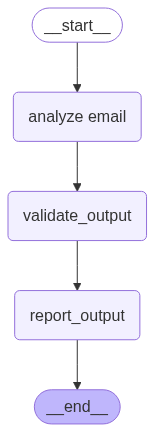

In [30]:
#Create the workfow state machine

from langgraph.graph.state import StateGraph, END, CompiledStateGraph

def create_workflow()-> CompiledStateGraph:
    try:
        workflow = StateGraph(WorkflowState)
        # Add nodes to the graph
        workflow.add_node("analyze email", analyze_email_dataset)
        workflow.add_node("validate_output", validate_output)
        workflow.add_node("report_output", store_output_data)

        # Define the flow of execution
        workflow.set_entry_point("analyze email")
        workflow.add_edge("analyze email", "validate_output")
        workflow.add_edge("validate_output", "report_output")
        workflow.add_edge("report_output", END)

        email_analyzer_app = workflow.compile()
        print("LangGraph workflow created successfully")
        return email_analyzer_app
    except Exception as e:
        print(f"Error creating workflow: {e}")
        traceback.print_exc()
        return None 
#test
create_workflow()

# Complete flow

In [31]:
from typing import List, Dict, Any
from datasets import Dataset
def run_anti_phishing_email_classifier_workflow(dataset: Dataset)->List[Dict[str, Any]]:
    try:
        email_dataset = format_dataset(dataset)
        workflow =  create_workflow()
        results = []
        for data in email_dataset:
            # initialize the workflow state
            init_state = WorkflowState(
                # the input.is_phishing is filtered out during prompting
                input=data,
                output=None,
                is_output_correct=False,
                llm_dataset_path=None,
                error=None
            )
            # run the workflow
            final_state = workflow.invoke(init_state)
            err = final_state.get("error")
            if err:
                result =  {
                    "status": "error",
                    "message": err,
                    "subject": data.subject,
                    "analysis_result": final_state.get("output"),
                    "is_correct": final_state.get("is_output_correct"),
                    "actual_label": data.is_phishing,
                    "llm_dataset_files": final_state.get("llm_dataset_path"),
                }
            else:
                if not final_state.get("output"):
                    result = {
                        "status": "error",
                        "message": "No analysis result found",
                        "subject": data.subject,
                        "analysis_result": None,
                        "is_correct": final_state.get("is_output_correct"),
                        "actual_label": data.is_phishing,
                        "llm_dataset_files": final_state.get("llm_dataset_path"),
                    }
                else:
                    result = {
                        "status": "success",
                        "message": "Analysis completed successfully",
                        "subject": data.subject,
                        "analysis_result": final_state.get("output"),
                        "is_correct": final_state.get("is_output_correct"),
                        "actual_label": data.is_phishing,
                        "llm_dataset_files": final_state.get("llm_dataset_path"),
                    }
            results.append(result)
        return results
    except Exception as e:
        err_msg = f"Critical error during email analysis pipeline: {str(e)}"
        print(f"[Pipeline Error] {err_msg}")
        traceback.print_exc()
        return []
        


    

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix   
import pandas as pd
from tqdm.notebook import tqdm
#Test and display the analysis on a table with limited dataset
def test_anti_phishing_email_classifier_workflow():
    # Tracking the evaluation metrics
    true_labels = []
    predicted_labels = []
    results = []
    try:
        limited_dataset = all_emails_dataset_only.select(range(1000))
        analysis_results = run_anti_phishing_email_classifier_workflow(limited_dataset)
        # Extract predicted label from analysis result
        for i, analysis_result in  enumerate(tqdm(analysis_results)):

            if isinstance(analysis_result, dict) and analysis_result.get('status') == "success" and 'analysis_result' in analysis_result:
                analysis_result_object = analysis_result['analysis_result']
                predicted_label = 1 if analysis_result_object.is_phishing else 0
                trust_score = analysis_result_object.trust_score
                # is prediction correct
                is_correct = analysis_result.get('is_correct')
                actual_label = 1 if analysis_result.get('actual_label', False) else 0

                # store metrics for calculation
                true_labels.append(actual_label)
                predicted_labels.append(predicted_label)
                results.append({
                    'index': i,
                    'actual_label': actual_label,
                    'subject': analysis_result.get('subject'),
                    'predicted_label': predicted_label,
                    'trust_score': trust_score,
                    'is_correct': is_correct,
                    'llm_dataset_files':analysis_result.get('llm_dataset_files'),
                    'llm_model': llm_model
                })
            else:
                print(f"Analysis failed for email {i}: {analysis_result.get('message','Unknown error')}")
            
        
            # Calculate evaluation metrics
        if true_labels and predicted_labels:
            accuracy = accuracy_score(true_labels, predicted_labels)
            precision = precision_score(true_labels, predicted_labels, zero_division=0)
            recall = recall_score(true_labels, predicted_labels, zero_division=0)
            f1 = f1_score(true_labels, predicted_labels, zero_division=0)
            conf_matrix = confusion_matrix(true_labels, predicted_labels)

            # Unpack confusion matrix into more interpretable variables
            if len(conf_matrix) == 2 and len(conf_matrix[0]) == 2:
                tn, fp = conf_matrix[0]
                fn, tp = conf_matrix[1]
            else:
                tn = fp = fn = tp = 0

            # Create a results DataFrame for visualization
            results_df = pd.DataFrame(results)

            # Visualization of results
            print("\n--- Evaluation Results ---")
            print(f"Accuracy: {accuracy:.2f}")
            print(f"Precision: {precision:.2f}")  # How many predicted phishing emails were actually phishing
            print(f"Recall: {recall:.2f}")  # How many actual phishing emails were detected
            print(f"F1 Score: {f1:.2f}")  # Harmonic mean of precision and recall

            print("\nConfusion Matrix:")
            print(f"True Negatives (correctly identified legitimate): {tn}")
            print(f"False Positives (legitimate misclassified as phishing): {fp}")
            print(f"False Negatives (phishing misclassified as legitimate): {fn}")
            print(f"True Positives (correctly identified phishing): {tp}")

            # Save summary to file
            summary = {
                'metrics': {
                    'accuracy': float(accuracy),
                    'precision': float(precision),
                    'recall': float(recall),
                    'f1': float(f1)
                },
                'confusion_matrix': {
                    'tn': int(tn),
                    'fp': int(fp),
                    'fn': int(fn),
                    'tp': int(tp)
                },
                'results': results
            }

            # Save summary to JSON file
            from datetime import datetime
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            summary_filename = f"evaluation_summary_{timestamp}.json"
            with open(summary_filename, 'w') as f:
                json.dump(summary, f, indent=2)
            print(f"\nSummary saved to {summary_filename}")

            # Display results table
            display(results_df[['subject', 'actual_label',  'predicted_label', 'trust_score', 'is_correct', 'llm_model']])
        else:
            print("No valid analysis results to evaluate")
    except Exception as e:
        print(f"Error in test_anti_phishing_email_classifier_workflow: {e}")

#run
test_anti_phishing_email_classifier_workflow()

LangGraph workflow created successfully


2025-07-28 11:02:24,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:02:27,632 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:03:38,470 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:04:24,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:04:27,529 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:05:33,911 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:06:47,326 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:07:02,576 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:08:33,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:10:08,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:10:46,903 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:12:04,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:12:09,955 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:13:39,397 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:14:59,607 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:15:02,170 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:15:54,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:16:29,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:16:31,755 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:17:46,683 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:18:52,924 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:19:07,741 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:20:24,109 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 11:21:30,858 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:21:34,551 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:22:40,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:24:01,102 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:24:16,314 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:25:52,537 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:26:56,481 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:26:59,754 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:28:08,437 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:28:53,740 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:28:56,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:29:56,424 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:31:07,020 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:31:21,954 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:33:08,760 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 11:34:17,393 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:35:45,205 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:36:54,260 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:36:57,794 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:37:49,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:38:39,668 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:38:47,422 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:40:04,522 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:41:16,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:41:31,499 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:43:07,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:44:22,568 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:45:43,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 11:48:22,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:48:29,399 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:49:42,274 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:51:10,395 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:52:01,904 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 11:53:30,457 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:53:37,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:54:32,279 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:55:44,484 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:55:59,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:57:49,875 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 11:58:52,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:58:58,192 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 11:59:54,021 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:01:00,388 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:01:08,084 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:02:10,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:02:51,277 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:02:54,726 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:03:47,563 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:04:24,323 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:04:26,927 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:05:20,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:05:57,417 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:06:00,254 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:07:13,850 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:08:14,825 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:08:23,803 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:09:19,680 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:09:52,664 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:09:55,290 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:10:55,451 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:11:55,223 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:11:59,265 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:13:24,087 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:15:15,949 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:15:34,682 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:17:15,196 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:18:36,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:18:39,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:19:44,857 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:20:37,914 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:20:43,173 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:21:57,157 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:22:49,873 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:22:57,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:23:43,576 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:24:23,890 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:24:28,993 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:25:58,098 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:27:15,377 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:27:30,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:29:27,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:30:40,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:30:43,420 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:31:31,094 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:32:19,291 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:32:21,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:33:21,685 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:34:01,779 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:34:06,383 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:35:00,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:35:55,861 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:35:58,881 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:37:09,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:37:53,984 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:37:56,813 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:39:20,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:40:11,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:40:26,662 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:42:12,007 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 12:43:51,101 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:43:54,222 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:45:09,474 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:45:51,772 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:45:58,270 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:46:57,732 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:47:44,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:47:48,491 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:49:11,545 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:50:03,460 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:50:10,649 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:51:07,226 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:51:41,234 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:51:43,717 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:52:30,929 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:53:26,007 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:53:33,720 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:54:21,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 12:55:39,327 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:55:54,066 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:57:30,673 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 12:58:58,819 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 12:59:13,922 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:00:42,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 13:02:02,474 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:02:09,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:03:06,698 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:03:52,937 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:03:56,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:04:59,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:05:31,686 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:05:36,335 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:06:27,707 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:07:15,555 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:07:20,286 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:08:09,733 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:09:10,909 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:09:17,077 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:10:19,747 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:11:55,954 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:12:03,263 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:13:09,906 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:14:53,009 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:15:22,752 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:16:58,502 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:18:05,673 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:18:14,128 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:19:10,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:20:26,260 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:20:28,862 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:21:30,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:22:11,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:22:18,165 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:23:30,646 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:24:28,373 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:24:32,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:25:33,010 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:26:15,764 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:26:18,857 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:27:39,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:28:34,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:28:37,262 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:29:45,198 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:30:23,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:30:28,561 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:31:18,601 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:31:58,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:32:01,418 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:33:13,917 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:34:11,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:34:17,729 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:35:20,791 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:36:04,658 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:36:07,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:37:15,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:38:09,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:38:24,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:40:18,370 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:41:14,597 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:41:17,369 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:42:14,991 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:43:06,301 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:43:21,503 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:45:02,197 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:46:21,863 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:46:36,997 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:47:42,550 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 13:49:08,089 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:49:11,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:50:29,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:51:14,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:51:17,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:52:24,341 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:53:22,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:53:40,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:54:59,378 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:55:58,633 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:56:01,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:57:05,051 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 13:57:57,054 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:58:53,704 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 13:59:50,118 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 13:59:52,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:00:47,128 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:01:33,191 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:01:38,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:02:37,832 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:03:35,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:03:38,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:04:21,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:05:28,617 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:05:43,816 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:06:47,076 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 14:07:53,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:07:56,322 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:09:12,252 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:09:58,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:10:01,891 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:11:06,877 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:11:49,781 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:11:52,581 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:13:03,302 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:13:51,213 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:13:57,991 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:14:55,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:15:35,680 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:15:39,454 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:16:51,538 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:17:58,827 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:18:13,989 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:19:29,438 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 14:20:29,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:20:31,905 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:21:15,705 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:22:01,886 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:22:04,240 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:22:39,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:23:23,501 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:23:27,213 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:24:39,815 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:25:08,392 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:25:11,168 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:26:30,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:27:11,195 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:28:06,382 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 14:29:18,041 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:29:35,255 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:30:56,419 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:32:27,853 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:32:50,880 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:34:55,369 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:36:02,542 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:36:07,189 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:37:06,023 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:38:08,784 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:38:23,508 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:39:58,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:40:59,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:41:03,491 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:41:54,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:42:37,175 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:42:42,264 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:43:30,087 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:44:16,038 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:44:22,193 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:45:19,861 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:46:08,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:46:14,201 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:47:17,561 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:48:09,588 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:48:12,383 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:48:56,594 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 14:50:02,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:50:07,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:51:19,885 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:53:08,516 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:54:20,853 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:55:12,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:55:16,470 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:56:24,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:57:01,708 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:57:04,935 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:58:12,494 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 14:59:12,667 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 14:59:27,785 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:00:40,609 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:01:54,348 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:02:09,496 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:04:04,979 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:05:01,721 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:05:04,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:05:54,586 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:06:33,201 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:06:35,983 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:07:48,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:08:17,670 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:08:20,744 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:09:39,193 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:11:58,728 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:12:22,006 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:13:25,476 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:19:33,546 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:19:48,598 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:21:07,278 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 15:22:11,452 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:22:13,942 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:23:06,264 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:24:03,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:24:18,140 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:25:27,630 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 15:26:26,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:26:29,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:27:35,927 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:28:42,398 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:28:57,472 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:30:07,885 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 15:31:17,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:31:22,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:32:12,806 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:32:48,655 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:32:51,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:34:12,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:34:54,251 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:34:56,984 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:35:47,165 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:36:31,628 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:36:35,154 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:37:25,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:38:15,775 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:38:22,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:39:19,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:40:09,810 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:40:23,280 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:41:21,896 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 15:42:16,563 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:42:20,218 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:43:25,098 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:44:08,160 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:44:11,740 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:44:51,368 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:45:40,241 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:45:46,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:46:33,940 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:47:59,059 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:48:02,729 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:49:05,507 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:49:52,582 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:49:55,904 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:50:51,478 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:51:25,075 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:51:29,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:52:09,750 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:53:02,734 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:53:05,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:53:45,109 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:54:11,128 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:54:13,402 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:55:04,285 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:55:51,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:56:04,522 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:57:31,730 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 15:58:32,212 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:58:34,457 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 15:59:12,999 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 15:59:56,892 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:00:03,708 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:00:52,733 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:01:35,115 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:01:37,359 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:02:30,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:03:27,408 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:03:40,759 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:05:11,914 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:06:05,020 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:06:07,480 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:07:07,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:08:06,968 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:08:20,403 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:09:20,123 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 16:10:54,452 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:11:23,976 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:12:35,478 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:13:40,071 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:13:42,394 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:14:37,368 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:15:16,764 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:15:19,261 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:16:18,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:16:57,908 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:17:01,239 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:18:04,128 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:18:48,842 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:18:52,172 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:19:57,931 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:20:40,486 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:20:42,927 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:21:34,868 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:22:30,524 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:22:43,860 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:24:03,514 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 16:25:43,022 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:26:39,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:27:54,821 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:28:08,047 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:29:16,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 16:31:24,275 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:31:34,039 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:33:09,173 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 16:33:57,555 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:34:01,197 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:34:56,385 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:35:23,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:35:26,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:36:24,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:37:15,089 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:37:22,286 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:38:11,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:38:41,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:38:44,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:39:38,897 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:40:40,514 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:40:51,771 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:41:42,895 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:42:55,313 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:42:57,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:43:46,462 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:44:44,654 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:44:55,263 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:45:58,732 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:47:37,482 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:48:15,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:48:44,148 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:48:46,414 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:49:47,030 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:50:17,284 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:50:20,661 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:51:46,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 16:53:00,929 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:53:16,364 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:54:14,059 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 16:57:00,304 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:57:15,782 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 16:58:13,632 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:00:30,487 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:01:21,778 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:02:10,620 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:02:13,093 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:03:16,047 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:03:43,427 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:03:45,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:04:34,149 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:05:07,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:05:11,656 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:06:07,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:06:49,784 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:06:53,321 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:07:42,071 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:08:18,551 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:08:22,138 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:09:00,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:09:32,297 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:09:36,936 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:10:33,205 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:11:25,097 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:11:30,370 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:12:44,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:13:35,463 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:13:42,535 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:14:39,529 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:16:09,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:16:40,005 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:18:01,583 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:19:33,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:20:30,451 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:21:26,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:21:29,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:22:19,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:22:52,199 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:22:54,707 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:23:47,223 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:25:17,708 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:25:32,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:27:23,871 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:30:03,607 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:30:16,940 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:31:16,918 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:32:46,213 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:32:59,638 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:33:57,801 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:34:49,634 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:34:52,314 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:36:00,181 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:36:45,017 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:36:47,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:37:48,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:38:23,763 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:38:26,252 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:39:16,990 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:39:56,315 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:39:58,862 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:40:46,315 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:41:33,993 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:41:36,749 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:42:32,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:43:12,320 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:43:14,792 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:44:16,956 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:45:09,750 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:46:21,963 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:47:28,040 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:47:41,395 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:48:51,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:50:23,725 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:50:26,053 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:51:12,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:52:16,206 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:52:57,146 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:54:35,631 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:54:48,971 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:55:50,074 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:57:02,192 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:57:06,308 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:57:43,634 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 17:58:13,166 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:58:15,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:59:20,330 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 17:59:50,460 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 17:59:53,722 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:01:14,205 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:02:53,561 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:03:03,061 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:04:38,906 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:06:55,587 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:07:28,208 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:09:22,446 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:12:33,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:13:15,896 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:15:11,043 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:18:18,645 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:18:32,771 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:19:54,384 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:21:36,886 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:21:43,910 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:23:32,998 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:24:52,052 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:24:59,380 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:27:01,150 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:29:39,526 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:31:44,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 18:32:57,493 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:33:02,709 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:34:18,855 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:35:22,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:35:36,251 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:36:50,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 18:37:57,034 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:38:10,258 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:39:41,206 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:40:39,681 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:40:53,837 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:41:46,806 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:42:31,073 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:42:44,543 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:43:57,574 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 18:45:06,049 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:45:19,320 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:46:50,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:47:47,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:47:50,434 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:48:37,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:49:31,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:49:42,035 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:50:25,419 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:50:54,701 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:50:56,997 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:51:48,606 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:52:32,117 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:52:34,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:53:22,247 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:54:01,035 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:54:04,599 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:55:05,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:55:58,468 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:56:00,784 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:57:05,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:57:52,535 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:57:59,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 18:58:37,275 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 18:59:31,401 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:00:06,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:01:09,626 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:01:27,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:02:33,365 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:03:27,479 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:03:33,145 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:04:09,714 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:05:40,422 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:06:12,125 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:07:35,977 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:09:01,927 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:09:59,129 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:10:43,266 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:10:48,640 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:11:38,650 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:13:04,817 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:13:20,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:14:06,148 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:16:23,808 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:17:44,954 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:19:24,823 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:19:27,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:20:03,323 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:20:46,618 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:20:54,891 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:21:48,547 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:23:00,550 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:23:13,740 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:24:37,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:25:47,333 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:26:00,509 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:27:17,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:28:38,185 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:28:49,122 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:29:51,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:30:51,299 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:31:55,661 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:33:55,704 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:34:08,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:35:33,013 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:36:59,305 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:37:12,159 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:38:47,457 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:40:39,479 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:40:52,724 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:42:23,356 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:43:41,004 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:43:54,183 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:44:53,714 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:46:15,002 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:46:19,854 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:47:02,165 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:47:49,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:47:51,659 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:48:47,063 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:49:39,064 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:49:52,320 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:51:07,203 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:51:54,498 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:51:56,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:52:57,312 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:53:35,874 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:53:41,766 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:54:34,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:55:08,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:55:11,247 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:56:04,940 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 19:56:58,398 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:57:11,370 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 19:58:21,268 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 19:59:48,404 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:00:01,719 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:01:22,944 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:02:23,374 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:02:27,492 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:03:21,814 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:04:07,007 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:04:20,310 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:05:17,044 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:06:20,454 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:06:31,937 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:07:28,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:08:36,670 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:08:49,452 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:10:18,716 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:11:55,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:13:07,704 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:15:04,195 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:15:19,490 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:16:07,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:18:03,402 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:18:16,250 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:19:41,349 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:20:34,939 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:20:41,612 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:21:25,298 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:25:01,794 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:25:20,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:28:58,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:29:03,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:30:00,569 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:30:55,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:30:58,298 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:31:40,870 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:32:18,497 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:32:31,242 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:33:34,853 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:34:37,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:34:50,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:36:13,144 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:37:07,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:37:12,277 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:38:03,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:39:09,305 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:39:22,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:40:50,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:42:06,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:42:19,199 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:43:36,143 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:44:43,958 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:44:56,760 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:46:04,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:47:23,602 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:48:30,476 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:49:41,715 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:49:54,946 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:51:11,558 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:52:03,382 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:52:05,992 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:52:56,085 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 20:53:52,990 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:54:06,209 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:55:08,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:56:11,199 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:56:13,864 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:57:09,136 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 20:58:04,879 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:58:18,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 20:59:15,160 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:00:23,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:00:36,810 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:01:49,605 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:03:01,973 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:03:15,227 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:04:36,471 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:05:50,587 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:06:03,416 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:07:21,890 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:08:28,396 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:08:41,232 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:09:43,067 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:11:08,399 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:11:23,706 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:12:57,174 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:14:44,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:14:47,671 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:15:27,180 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:16:20,078 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:16:32,892 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:18:05,105 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:19:14,460 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:19:27,279 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:20:38,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:21:39,972 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:22:28,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:23:33,785 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:23:46,999 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:25:04,438 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:25:55,687 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:25:58,214 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:26:34,203 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:27:11,621 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:27:14,369 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:27:51,328 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:28:25,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:28:28,657 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:29:06,528 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:29:41,453 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:29:47,614 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:30:30,292 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:31:00,572 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:31:04,115 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:31:51,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:32:57,886 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:34:32,874 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:35:21,665 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:35:24,099 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:36:01,888 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:36:27,964 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:36:30,471 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:37:07,280 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:37:45,780 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:37:48,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:38:33,463 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:39:27,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:39:41,118 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:40:39,622 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:42:04,695 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:42:17,528 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:43:33,084 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:44:36,481 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:44:49,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:46:14,570 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:47:23,478 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:47:36,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:49:06,314 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:50:13,070 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:50:15,632 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:51:16,975 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:52:07,029 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:52:19,876 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:53:26,462 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:54:10,773 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:54:13,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:55:01,573 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:55:44,470 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:55:57,633 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:56:55,984 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 21:57:47,628 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:57:51,292 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:58:36,564 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 21:59:16,928 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:59:19,227 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 21:59:59,315 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:00:52,675 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:01:05,896 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:02:19,148 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:03:08,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:03:10,639 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:03:55,094 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:04:32,061 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:04:36,545 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:05:28,251 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:06:20,937 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:06:23,175 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:07:18,351 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:07:54,502 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:07:56,820 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:08:30,975 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:09:06,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:09:08,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:09:56,189 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:10:35,885 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:10:38,899 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:11:29,207 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:15:27,216 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:16:00,939 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:17:30,037 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:18:39,539 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:18:45,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:19:32,232 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:20:26,473 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:20:39,321 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:21:50,287 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:22:57,963 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:23:10,753 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:24:41,844 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:25:53,010 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:26:05,773 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:27:42,989 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:28:58,896 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:29:58,887 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:30:42,100 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:30:46,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:31:34,561 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:32:00,743 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:32:03,964 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:32:39,757 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:33:21,818 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:33:38,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:34:50,017 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:36:00,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:37:59,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:39:16,908 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:39:32,117 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:40:27,753 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:42:22,859 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:42:27,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:43:20,199 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:44:25,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:44:38,323 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:45:52,021 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:47:19,945 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:47:33,150 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:48:58,444 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:50:32,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:50:47,897 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:51:40,675 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 22:53:38,768 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:53:47,463 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:54:50,324 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:55:39,421 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:55:42,117 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:56:36,444 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 22:57:38,554 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:57:51,778 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 22:59:27,446 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:00:22,044 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:00:24,022 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:01:17,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:01:49,037 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:01:53,121 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:02:27,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:03:22,857 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:03:25,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:04:09,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:04:49,620 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:04:52,021 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:05:40,956 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:06:06,107 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:06:08,600 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:07:08,188 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:07:48,284 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:07:54,512 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:08:57,173 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:09:27,599 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:09:29,891 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:10:36,728 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:11:44,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:11:59,878 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:12:57,216 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 23:15:15,286 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:15:28,159 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:16:45,612 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:17:43,186 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:17:46,247 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:18:36,569 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:19:30,944 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:19:43,901 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:21:05,139 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:22:07,752 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:22:20,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:23:45,757 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:24:34,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:24:38,933 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:25:23,997 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:26:03,652 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:26:16,594 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:27:33,106 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:28:29,335 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:28:36,652 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:29:25,706 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:29:56,297 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:30:00,886 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:30:42,656 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:31:11,960 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:31:15,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:32:19,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:32:45,955 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:32:49,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:33:44,160 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:34:31,960 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:34:37,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:35:49,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 23:36:56,627 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:37:01,854 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:37:47,667 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:38:50,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:39:03,410 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:40:16,406 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:41:09,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:43:16,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 23:48:01,702 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:49:05,434 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 23:51:04,650 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:51:17,628 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:52:37,871 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-28 23:53:35,668 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:53:41,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:54:19,343 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:55:07,683 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:55:20,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:56:34,455 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:57:27,950 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:57:31,490 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:58:17,016 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-28 23:58:58,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:59:00,887 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-28 23:59:56,001 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:00:31,301 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:00:33,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:01:36,677 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:02:04,135 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:02:06,362 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:03:02,516 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:03:38,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:03:43,086 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:04:28,955 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:05:15,438 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:05:18,054 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:06:04,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:06:41,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:06:44,102 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:07:30,746 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:08:25,265 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:08:38,610 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:09:59,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:10:50,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:10:52,569 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:11:50,542 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:12:16,070 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:12:18,398 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:13:19,378 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:14:07,479 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:14:11,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:14:53,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:15:49,195 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:16:02,152 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:17:30,656 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:18:19,707 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:18:22,191 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:19:10,530 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:19:47,184 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:19:52,472 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:21:00,157 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:22:09,700 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:22:25,061 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:23:20,282 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 00:25:23,075 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:25:25,633 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:26:08,006 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:27:01,602 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:27:14,477 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:28:36,166 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:29:25,649 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:29:28,314 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:30:28,229 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:30:59,261 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:31:02,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:32:03,505 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:32:44,228 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:32:47,850 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:33:32,576 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 00:34:20,362 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:34:23,080 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:35:07,189 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:35:54,829 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:35:58,108 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:36:33,432 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:37:10,062 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:37:17,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:38:22,395 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:39:14,533 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:39:19,118 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:40:15,850 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 00:40:58,570 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:41:43,726 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 00:42:42,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:49:17,786 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 00:56:36,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:56:49,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:58:01,002 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 00:59:14,626 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 00:59:57,783 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:00:46,715 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:00:53,012 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:01:49,557 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:02:28,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:02:33,483 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:03:17,112 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:04:02,393 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:04:05,053 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:04:47,341 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:05:42,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:05:55,332 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:06:54,564 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:08:07,320 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:08:20,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:09:24,036 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:10:32,924 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:10:46,328 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:12:15,018 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:13:40,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:13:55,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:14:43,104 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:16:30,169 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:16:32,184 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:17:17,040 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:19:41,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:19:54,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:20:39,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:21:15,774 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:22:04,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:22:56,601 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:22:59,244 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:23:41,385 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:24:43,958 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:24:57,317 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:25:55,280 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:26:59,343 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:27:07,764 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:28:07,152 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:29:00,198 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:29:02,195 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:29:43,719 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:30:30,325 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:30:43,563 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:32:03,062 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:33:34,770 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:33:48,037 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:34:56,055 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:35:49,661 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:35:52,006 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:36:35,067 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:37:10,949 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:37:53,556 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:38:56,619 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:38:59,117 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:40:01,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:40:35,039 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:40:37,359 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:41:08,852 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:42:01,044 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:42:14,437 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:43:17,124 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:44:07,093 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:44:09,595 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:45:02,700 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:45:57,611 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:46:10,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:47:32,135 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:48:24,122 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:48:27,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:49:19,408 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:50:23,354 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:50:36,387 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:51:48,063 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 01:52:56,285 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:52:58,327 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:54:08,184 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:54:44,416 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:54:50,554 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:55:52,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:56:43,061 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:56:46,021 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:57:36,721 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:58:19,115 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:58:22,643 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:59:17,286 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 01:59:41,391 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 01:59:44,572 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:00:15,514 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:00:55,594 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:01:03,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:01:51,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:02:51,842 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:02:56,389 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:03:46,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:04:44,509 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:04:57,486 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:06:09,031 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:07:04,400 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:08:06,918 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:09:09,962 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:09:13,213 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:10:06,569 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:10:36,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:11:06,248 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:12:01,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:12:14,690 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:13:20,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 02:14:40,499 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:14:53,781 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:16:18,823 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:17:22,032 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:17:24,480 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:18:21,225 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:18:57,813 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:19:01,935 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:19:44,562 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:20:23,625 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:20:27,781 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:21:18,617 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:21:50,316 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:21:52,980 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:22:30,887 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:23:16,883 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:23:19,210 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:24:00,841 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:24:35,015 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:24:37,494 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:25:41,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:26:23,785 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:26:36,685 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:27:54,079 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 02:29:01,046 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:29:14,371 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:30:15,436 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 02:31:09,177 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:31:12,411 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:31:57,384 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:32:40,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:32:43,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:33:28,015 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:34:18,040 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:34:28,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:35:22,941 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:36:34,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:36:47,599 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:37:59,923 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 02:39:10,285 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:39:16,464 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:39:55,631 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:40:19,968 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:40:22,143 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:41:00,876 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:41:53,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:42:07,022 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:43:23,630 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:44:13,318 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:44:15,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:44:53,777 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:45:27,276 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:45:30,551 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:46:13,752 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:46:51,292 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:46:55,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:48:13,873 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:49:21,302 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:49:24,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:50:24,786 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:51:16,409 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:51:21,992 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:52:09,650 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:53:03,860 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:53:06,163 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:53:49,410 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:54:24,528 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:54:26,817 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:55:25,199 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:56:22,066 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:57:07,169 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:57:57,302 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:58:00,058 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:58:59,155 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 02:59:49,000 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 02:59:54,662 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:00:59,553 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:01:46,136 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:01:48,806 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:02:39,952 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:03:06,562 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:03:09,758 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:03:54,768 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 03:04:37,843 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:04:41,910 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:05:30,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:06:28,557 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:06:32,591 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:07:55,412 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:09:09,106 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:10:12,483 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:11:11,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:11:37,217 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:12:36,124 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:12:51,415 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:13:59,856 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:16:17,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:16:34,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:17:53,560 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 03:22:58,871 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:23:03,065 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:24:09,402 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 03:25:08,235 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:25:21,112 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:26:35,874 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:27:52,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:28:05,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:29:11,081 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 03:30:20,804 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:31:05,183 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:31:54,904 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:31:57,639 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:33:08,719 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:33:58,666 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:34:00,961 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:34:53,695 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:35:33,353 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:35:37,425 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:36:19,637 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:37:08,797 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:37:11,443 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:37:52,339 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:38:38,875 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:38:41,504 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:39:33,830 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:40:24,608 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:40:27,143 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:41:18,892 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:42:37,564 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:42:42,968 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:43:59,705 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:45:08,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:45:10,933 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:46:12,261 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:46:51,401 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:46:53,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:47:47,138 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:48:21,810 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:48:24,419 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:49:05,313 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:49:33,060 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:49:35,352 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:50:22,805 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:50:57,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:51:00,016 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:52:03,354 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:52:29,935 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:52:32,662 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:53:22,959 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:54:02,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:54:04,878 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:54:54,840 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:55:51,443 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:56:04,301 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:57:21,321 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:58:12,166 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:58:14,493 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 03:59:07,680 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 03:59:56,468 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:00:09,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:01:21,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 04:02:18,560 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:02:20,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:03:22,141 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:03:48,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:03:50,371 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:04:30,516 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:06:36,169 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:06:58,768 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:08:03,712 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:08:41,776 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:08:44,347 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:09:33,087 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:09:59,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:10:02,187 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:10:43,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:11:19,387 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:11:21,999 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:11:53,334 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:12:25,587 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:12:28,375 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:13:17,466 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:13:56,222 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:13:59,512 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:14:37,663 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:15:26,342 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:15:28,841 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:16:20,351 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:17:05,849 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:17:08,306 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:17:57,192 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:18:34,161 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:18:36,714 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:19:22,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:19:58,116 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:20:00,720 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:20:41,151 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:21:18,203 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:21:20,335 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:21:53,279 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:22:20,765 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:22:23,346 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:23:25,296 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:24:09,145 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:25:12,931 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 04:27:05,486 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:27:18,791 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:28:38,445 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:30:02,138 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:30:15,445 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:31:11,439 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 04:32:36,451 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:32:49,708 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:34:05,098 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 04:35:31,513 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:35:33,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:36:19,412 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:36:48,958 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:36:51,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:37:33,490 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:38:25,078 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:39:12,295 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 04:40:00,174 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:40:02,679 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:40:56,456 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:41:44,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:42:17,342 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:42:55,516 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:42:57,518 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:43:36,069 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:43:59,648 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:44:02,174 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:45:04,899 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:47:47,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:48:15,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:49:21,771 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:55:10,997 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:55:14,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:56:26,441 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:57:10,251 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:57:12,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:57:50,716 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:58:18,241 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:58:21,754 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:59:21,648 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 04:59:54,678 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 04:59:57,148 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:00:41,923 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:01:07,832 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:01:10,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:02:00,736 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:02:48,309 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:02:53,884 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:03:31,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:04:39,834 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:04:42,109 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:05:25,060 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:06:01,396 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:06:08,819 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:06:53,517 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:07:45,239 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:08:49,600 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 05:10:28,371 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:10:31,146 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:11:30,488 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:12:10,592 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:12:13,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:13:04,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:13:50,559 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:13:53,121 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:14:43,400 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:15:23,809 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:15:26,356 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:16:19,119 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:17:12,439 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:17:25,732 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:18:50,830 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:20:07,624 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:20:21,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:21:45,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 05:22:55,491 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:23:08,807 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:24:22,645 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 05:25:12,560 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:25:16,651 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:26:06,661 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:26:40,774 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:26:43,311 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:27:59,430 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:28:39,787 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:28:42,428 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:29:58,341 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:30:54,878 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:31:27,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:32:08,348 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:32:11,526 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:33:09,969 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:33:55,508 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:34:08,767 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:35:39,397 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:36:53,532 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:37:02,915 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:38:41,224 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:38:47,622 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:39:31,344 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:40:29,539 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:40:32,252 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:41:29,209 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:42:04,186 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:42:06,895 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:43:46,591 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:44:15,292 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:44:18,254 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:44:56,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:45:27,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:45:33,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:46:15,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:46:45,601 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:46:48,529 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:47:28,979 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:48:13,611 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:48:19,774 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:49:04,621 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:49:49,883 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:49:54,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:50:33,282 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:51:22,856 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:51:27,492 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:52:09,352 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:53:07,441 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:53:13,230 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:53:59,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:54:21,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:54:23,836 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:55:20,826 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:55:54,694 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:55:56,700 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:56:42,951 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:57:13,912 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:57:18,395 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:58:17,260 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 05:58:45,065 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:58:48,670 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 05:59:55,937 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:00:18,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:00:20,851 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:01:22,586 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:02:02,353 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:02:05,067 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:03:13,011 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:04:14,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:04:27,585 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:05:51,879 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:06:45,107 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:06:47,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:07:44,982 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:08:23,672 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:08:26,860 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:09:39,035 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:10:20,252 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:10:29,327 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:11:51,403 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 06:13:34,101 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:13:47,405 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:15:16,425 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:16:10,795 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:16:13,301 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:16:58,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:17:50,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:18:04,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:19:13,105 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:20:02,332 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:20:04,673 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:20:52,350 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:21:28,033 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:21:31,310 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:22:23,240 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:23:08,833 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:23:11,591 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:24:09,336 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:24:54,008 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:24:56,559 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:25:39,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:26:32,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:26:45,959 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:28:03,655 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:29:35,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:29:46,575 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:30:42,954 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:31:52,160 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:31:58,434 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:32:57,147 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:33:47,922 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:33:50,669 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:34:41,477 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:35:27,779 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:35:30,377 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:36:11,961 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:36:45,954 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:36:48,540 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:37:31,053 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:38:02,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:38:05,018 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:38:49,475 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:39:32,714 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:39:35,969 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:40:15,312 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:40:37,155 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:40:39,789 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:41:15,376 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:42:13,413 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:43:04,296 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:43:48,445 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:43:50,723 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:44:37,805 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:45:10,502 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:45:14,720 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:45:55,725 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:46:41,798 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:46:47,807 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:47:40,475 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:48:20,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:48:24,404 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:49:03,085 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:49:49,915 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:49:52,206 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:50:40,086 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:51:23,918 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:51:33,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:52:33,494 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:53:13,951 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:53:16,566 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:54:11,108 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:54:41,825 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:54:44,150 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:55:20,307 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:55:55,303 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:55:59,833 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:56:50,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 06:57:39,279 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:57:52,590 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 06:58:58,770 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 07:00:06,651 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:00:19,979 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:01:12,167 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:02:23,583 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:02:36,791 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:03:39,506 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 07:04:41,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:04:43,779 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:05:35,103 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:06:15,412 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:06:19,088 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:07:08,888 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:07:53,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:07:56,579 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:09:00,443 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:09:58,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:10:41,293 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:11:44,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:11:58,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:13:20,297 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 07:14:28,019 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:14:30,323 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:15:05,013 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:15:39,413 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:15:41,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:16:44,345 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:17:33,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:17:48,628 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:18:46,752 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:19:43,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:19:56,743 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:21:19,796 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:22:25,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:22:38,328 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:24:00,221 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:25:10,132 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:25:23,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:26:40,622 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:27:33,334 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:27:39,420 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:28:48,174 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:29:37,485 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:29:39,748 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:30:21,369 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:31:13,803 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:31:26,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:32:47,442 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:33:39,978 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:33:42,604 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:34:23,126 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:34:57,424 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:35:06,120 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:35:48,924 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:36:36,000 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:36:47,482 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:37:50,815 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:39:00,894 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:39:03,227 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:39:49,722 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:40:24,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:40:26,892 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:41:07,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 07:42:09,969 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:42:23,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:43:57,803 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:44:48,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:44:50,611 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:45:51,331 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:46:36,017 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:46:41,658 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:47:33,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:48:02,817 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:48:52,988 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:48:56,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:49:51,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:50:46,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:51:03,904 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:52:05,824 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:52:47,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:52:50,287 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:53:27,781 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:53:57,551 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:54:01,101 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:54:47,441 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:55:23,393 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:55:26,689 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:56:07,368 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:56:56,886 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:57:05,198 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:58:13,889 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 07:59:06,512 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 07:59:09,493 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:00:16,207 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:01:06,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:01:16,554 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:02:19,950 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:03:02,295 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:03:05,180 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:04:06,067 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:04:42,302 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:04:44,771 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:05:27,620 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:06:14,384 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:06:17,162 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:07:16,967 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:07:57,579 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:08:00,529 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:08:25,843 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:09:01,431 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:09:04,577 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:09:52,778 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:10:19,826 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:10:22,309 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:11:49,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:12:29,100 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:12:31,606 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:13:24,553 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:14:23,737 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:14:37,045 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:15:49,894 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 08:16:50,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:16:52,438 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:17:34,517 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:18:08,936 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:18:12,545 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:18:45,200 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:19:14,320 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:19:16,621 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:20:01,131 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:20:55,763 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:21:08,725 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:22:30,514 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:23:25,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:23:28,838 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:24:33,126 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:25:05,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:25:07,595 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:25:46,518 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:26:24,357 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:26:27,006 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:27:15,128 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:27:58,988 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:28:03,068 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:28:53,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:29:35,319 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:29:48,610 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:30:44,396 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 08:32:01,213 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:32:14,455 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:33:10,329 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 08:34:24,800 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:34:38,015 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:35:50,805 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:36:48,939 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:36:53,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:38:05,823 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:38:32,261 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:38:34,515 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:39:23,854 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:40:00,063 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:40:04,608 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:41:06,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:41:33,322 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:41:35,999 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:42:20,192 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:43:09,941 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:43:12,446 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:44:02,389 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:45:16,596 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:45:31,948 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:46:56,887 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:48:44,885 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:48:47,305 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:49:43,834 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:50:29,849 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:50:43,242 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:51:48,873 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:52:58,853 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:53:03,405 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:53:54,505 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:54:37,663 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:54:42,292 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:55:43,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:56:34,879 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:56:40,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:57:30,079 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:58:08,808 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:58:14,414 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:58:55,221 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 08:59:26,050 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 08:59:33,556 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:00:28,273 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:01:06,328 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:01:10,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:01:49,208 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:03:06,835 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:03:23,099 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:04:26,270 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:05:23,795 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:05:29,535 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:06:28,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:06:55,343 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:06:57,570 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:08:12,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:08:44,534 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:08:46,874 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:09:31,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:10:06,025 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:10:08,515 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:10:56,521 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:11:33,650 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:11:36,163 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:12:19,471 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:12:56,651 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:13:00,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:13:37,282 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:14:03,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:14:06,182 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:15:19,458 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:16:05,523 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:16:52,298 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 09:17:45,759 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:17:54,027 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:18:41,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:19:08,878 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:19:11,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:19:53,883 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:20:44,385 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:20:49,823 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:21:41,218 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:22:23,015 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:22:25,265 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:22:58,229 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:23:31,943 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:23:34,235 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:24:06,391 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:24:40,748 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:24:43,276 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:25:31,385 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:26:23,344 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:26:36,691 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:28:05,493 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:29:16,508 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:29:21,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:29:57,506 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:31:25,099 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:31:38,346 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:32:35,813 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 09:33:34,875 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:33:39,357 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:34:29,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:35:22,845 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:35:25,104 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:36:05,222 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:37:18,775 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:37:34,541 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:38:55,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 09:41:38,989 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:41:52,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:43:10,903 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 09:44:23,665 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:44:32,711 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:45:17,380 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:45:49,157 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:45:51,593 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:46:56,146 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:47:37,825 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:47:41,036 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:48:21,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:49:03,236 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:49:08,538 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:50:06,126 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:50:43,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:50:45,709 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:51:38,331 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:52:22,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:52:30,234 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:53:11,176 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:53:51,790 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:53:54,310 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:54:47,612 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 09:55:28,466 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:55:32,944 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:56:31,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:57:06,298 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:57:09,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:58:14,620 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 09:58:43,043 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:58:48,765 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 09:59:26,349 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:00:04,987 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:00:09,069 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:00:58,722 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:01:34,016 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:01:37,568 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:02:24,734 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:03:01,115 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:03:03,599 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:03:54,444 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:05:06,883 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:05:22,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:06:51,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:08:54,053 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:09:26,427 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:10:24,496 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:10:37,464 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:12:08,764 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:13:18,396 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:13:31,746 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:15:04,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:15:57,681 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:16:02,927 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:17:11,059 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:17:56,306 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:18:01,272 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:18:40,679 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:19:22,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:19:24,704 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:20:10,264 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:20:51,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:20:57,116 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:21:42,698 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:22:38,453 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:22:51,857 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:24:00,884 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 10:25:02,414 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:25:04,713 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:25:58,179 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:26:34,807 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:26:37,283 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:27:23,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:28:20,064 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:28:33,323 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:29:52,180 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:30:55,230 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:31:04,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:31:53,862 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:32:53,229 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:33:06,081 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:34:02,146 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 10:35:09,142 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:35:22,031 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:36:49,291 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:37:39,076 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:37:41,415 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:38:21,819 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:39:14,637 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:39:27,492 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:40:54,092 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:42:01,882 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:42:15,155 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:43:31,089 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 10:44:53,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:44:59,227 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:45:49,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:46:35,992 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:46:38,698 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:47:38,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:48:29,058 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:48:31,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:49:21,098 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:50:04,607 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:50:07,245 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:50:40,425 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:51:10,158 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:51:17,819 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:52:16,767 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:53:07,163 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:53:15,534 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:54:27,872 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:55:07,023 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:55:11,475 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:56:03,572 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:56:45,696 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:56:50,310 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:57:39,663 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:58:13,793 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:58:16,737 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:58:57,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 10:59:28,186 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 10:59:31,775 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:00:14,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:00:58,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:01:04,264 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:01:52,097 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:02:38,110 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:02:51,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:04:06,203 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:05:16,432 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:05:20,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:06:02,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:07:16,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:07:20,998 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:08:08,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:08:52,295 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:09:05,176 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:10:31,223 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 11:11:39,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:11:52,767 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:13:05,235 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:14:11,340 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:14:24,159 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:15:37,143 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 11:16:53,251 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:17:06,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:18:24,153 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:19:21,186 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:19:25,225 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:20:11,681 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:20:56,164 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:20:58,422 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:21:51,796 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:22:30,852 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:22:33,339 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:23:23,868 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:24:09,159 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:24:53,381 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:26:13,770 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:26:16,785 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:27:01,274 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:27:55,505 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:28:00,011 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:29:04,170 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:30:27,833 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:30:33,919 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:31:22,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:32:25,777 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:32:28,287 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:33:30,257 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:34:08,066 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:34:10,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:35:12,722 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:36:24,367 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:37:44,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:38:23,392 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:38:25,846 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:39:25,934 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:40:19,240 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:40:32,072 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:41:49,425 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:42:59,304 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:43:12,472 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:44:31,479 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:45:43,086 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:45:55,874 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:47:23,359 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:48:29,408 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:48:42,321 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:50:01,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:51:07,290 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:52:06,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:53:39,546 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:53:52,915 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:55:23,192 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:56:30,953 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:56:44,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:58:04,393 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 11:58:57,933 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 11:59:57,241 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:01:54,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:02:07,348 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:03:15,713 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:04:31,916 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:04:44,750 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:06:18,107 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:07:27,790 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:07:40,599 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:08:53,965 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:09:44,859 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:09:47,165 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:10:26,250 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:11:22,406 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:11:35,595 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:12:33,551 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:13:28,176 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:13:30,810 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:14:15,480 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:15:06,573 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:15:08,854 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:15:47,281 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:16:35,032 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:17:09,478 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:18:18,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:18:34,365 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:19:22,666 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:21:29,519 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:21:42,374 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:23:11,239 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:24:03,051 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:24:05,631 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:25:02,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:25:57,671 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:27:25,389 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:28:07,477 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:28:12,078 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:29:03,611 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:30:49,312 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:31:02,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:32:27,250 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:33:41,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:33:45,350 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:34:33,185 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:35:25,598 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:35:31,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:36:15,367 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:37:01,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:37:14,543 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:38:18,661 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:39:21,652 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:39:37,216 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:40:22,995 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:41:00,521 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:41:09,278 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:42:20,824 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:43:33,525 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:44:43,465 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:46:13,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:46:16,051 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:47:12,800 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:47:57,032 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:47:59,052 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:48:52,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:49:24,471 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:49:27,365 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:50:19,499 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:51:01,552 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:51:08,143 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:51:51,592 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:52:42,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:52:44,823 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:53:38,955 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:54:28,685 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:54:41,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:56:14,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 12:57:25,222 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:57:27,739 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:58:08,981 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 12:59:01,759 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 12:59:14,953 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:00:24,086 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:01:48,009 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:01:54,267 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:03:04,256 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:04:11,497 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:04:24,386 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:05:41,550 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:07:03,413 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:07:16,622 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:08:43,864 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:09:49,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:10:02,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:11:13,622 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:12:15,396 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:12:19,497 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:13:37,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:14:07,867 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:15:10,480 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:17:03,646 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:17:18,725 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:18:11,274 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:19:09,096 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:19:11,729 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:20:00,900 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:20:40,873 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:20:53,663 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:22:24,382 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:23:37,674 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:23:50,942 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:25:28,614 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:27:32,162 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:27:52,176 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:29:38,109 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:30:24,992 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:30:28,178 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:31:25,232 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:32:15,262 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:32:23,586 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:33:15,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:33:59,688 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:34:03,810 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:34:54,054 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:35:31,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:35:35,093 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:36:12,565 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:37:05,509 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:38:02,691 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:39:23,242 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:39:38,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:40:33,407 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:42:38,383 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:42:51,216 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:44:18,856 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:45:20,901 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:45:24,959 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:46:16,532 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:47:03,102 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:48:06,772 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 13:49:43,303 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:49:46,272 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:50:44,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:51:45,153 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:52:34,315 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:53:17,648 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:53:20,155 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:54:14,570 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:55:07,694 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:55:20,971 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:56:46,477 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:57:36,285 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:57:38,375 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 13:58:38,397 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 13:59:33,575 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:00:43,611 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:01:33,748 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:01:36,019 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:02:27,046 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:03:05,064 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:03:07,516 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:04:12,332 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:04:53,491 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:04:55,763 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:05:51,352 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:06:44,207 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:06:57,019 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:07:58,424 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:08:57,556 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:09:03,358 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:10:07,499 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:11:07,332 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:11:20,532 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:12:33,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:13:44,453 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:13:57,299 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:15:05,649 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:16:13,449 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:16:26,728 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:17:53,884 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:19:01,712 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:19:14,534 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:20:34,409 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:21:25,812 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:21:27,928 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:22:18,009 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:22:53,549 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:22:56,011 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:23:38,531 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:24:31,047 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:24:43,981 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:25:57,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:26:53,830 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:26:57,031 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:27:52,163 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:28:33,856 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:28:36,322 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:29:28,244 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:30:04,476 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:30:06,990 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:31:27,395 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:32:31,560 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:33:53,309 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:34:24,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:34:26,747 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:35:30,150 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:36:22,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:36:35,739 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:37:52,479 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:38:44,877 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:38:47,094 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:39:59,087 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:40:37,674 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:40:41,782 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:41:27,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:42:17,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:42:27,289 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:43:57,367 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:44:37,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:44:42,519 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:45:28,466 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:46:00,765 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:46:03,963 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:46:57,827 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:47:59,967 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:48:12,858 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:49:43,983 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:50:52,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:51:05,540 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:52:24,814 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:53:33,454 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:53:46,346 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:55:02,148 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:56:09,214 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:56:15,481 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:57:02,833 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 14:58:01,055 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 14:59:01,973 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 14:59:37,655 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:00:47,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:03:16,650 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:03:20,731 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:04:10,536 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:05:02,005 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:05:15,324 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:06:06,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:07:05,099 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:07:07,519 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:08:03,831 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:08:57,507 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:09:10,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:10:23,744 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:11:52,070 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:12:05,404 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:13:12,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:14:27,408 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:14:40,227 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:15:42,296 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:16:39,065 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:16:51,944 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:17:49,704 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:18:48,017 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:19:00,881 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:20:47,405 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:21:33,537 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:21:35,745 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:22:16,431 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:23:05,683 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:23:18,606 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:24:37,161 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:25:26,788 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:25:29,425 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:26:16,539 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:26:48,541 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:26:51,474 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:27:45,967 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:28:38,759 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:28:41,785 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:29:22,219 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:30:14,639 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:30:29,775 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:31:32,647 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:32:31,302 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:32:33,502 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:33:19,541 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:34:01,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:34:07,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:34:50,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:35:23,038 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:35:30,520 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:36:26,978 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:37:22,492 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:37:35,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:38:32,962 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:39:26,931 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:39:31,441 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:40:37,194 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:41:32,862 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:41:45,684 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:43:03,234 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:44:03,338 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:45:08,669 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 15:46:54,841 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:46:57,855 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:47:42,901 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:48:32,369 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:48:35,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:49:20,340 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:50:05,621 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:50:10,891 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:51:07,099 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:52:05,371 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:52:12,444 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:53:10,825 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:53:44,512 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:53:49,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:54:40,685 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:55:37,030 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:55:49,896 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:57:22,764 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 15:58:33,052 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:58:48,924 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 15:59:50,832 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:00:55,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:01:08,746 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:02:11,444 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:03:22,988 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:03:26,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:04:24,177 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:05:16,668 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:05:22,275 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:06:18,264 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:06:47,876 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:06:51,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:07:28,695 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:08:27,722 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:08:42,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:09:37,798 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:11:25,210 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:11:28,641 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:12:21,682 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:12:57,054 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:12:59,709 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:14:00,258 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:14:39,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:14:42,793 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:15:17,460 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:15:42,028 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:15:44,542 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:16:43,277 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:17:16,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:17:19,211 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:18:22,766 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:19:15,994 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:19:29,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:20:37,299 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:21:21,996 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:21:24,615 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:22:28,781 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:23:11,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:23:27,262 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:23:56,829 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:24:38,913 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:24:42,417 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:25:32,294 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:26:40,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:26:53,584 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:28:31,258 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:29:30,030 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:29:32,330 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:30:16,936 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:31:02,548 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:31:07,019 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:32:18,122 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:33:45,273 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:33:58,114 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:35:17,127 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:36:13,069 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:36:15,566 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:37:00,667 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:38:01,344 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:38:18,187 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:39:08,456 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:39:57,767 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:40:00,672 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:40:43,071 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:41:17,956 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:41:27,960 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:42:26,076 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:43:18,378 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:43:22,466 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:44:14,168 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:44:52,208 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:44:58,101 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:45:41,835 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:46:18,519 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:46:22,605 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:47:01,014 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:47:37,911 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:47:41,467 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:48:33,373 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:49:24,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:49:28,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:50:32,059 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:51:19,665 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:51:23,258 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:52:13,600 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:52:57,291 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:52:59,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:53:49,448 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:54:47,513 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:55:00,854 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:56:15,737 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 16:57:16,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:57:20,895 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:58:10,386 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 16:59:03,607 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 16:59:10,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:00:21,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:00:57,883 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:01:00,428 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:02:04,203 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:02:53,066 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:02:55,419 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:03:49,509 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:04:15,115 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:04:17,462 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:05:25,915 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:05:59,370 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:06:07,185 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:06:54,943 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:07:25,269 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:07:27,780 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:08:25,330 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:09:03,949 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:09:06,451 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:10:03,799 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:10:47,484 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:11:23,589 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:12:28,494 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:12:33,001 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:13:18,378 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:14:36,020 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:14:40,275 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:15:31,552 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:17:17,932 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:17:28,343 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:18:08,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:21:16,991 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:21:30,223 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:22:27,638 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 17:23:24,311 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:23:30,939 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:24:17,380 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:25:03,651 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:25:06,818 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:25:56,634 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 17:26:49,941 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:27:01,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:27:48,576 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:29:19,694 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:29:31,484 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:30:29,464 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:33:00,116 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:33:02,694 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:33:48,435 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:34:38,172 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:35:47,977 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:36:21,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:36:25,802 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:37:23,586 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:38:14,895 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:38:18,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:39:00,548 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:40:03,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:40:08,221 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:41:01,095 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:42:09,282 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:42:11,754 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:43:05,111 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:44:06,732 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:44:24,350 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:45:19,852 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:46:07,638 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:46:20,905 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:47:17,851 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 17:48:29,471 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:48:31,925 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:49:25,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:49:57,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:50:22,523 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:51:08,290 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:51:10,948 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:52:00,914 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:52:36,710 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:52:39,200 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:53:27,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:54:04,717 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:54:09,304 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:54:57,766 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:55:38,951 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:55:52,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:57:25,739 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 17:58:25,798 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:58:37,340 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 17:59:30,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:00:05,401 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:00:07,353 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:01:01,035 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:01:25,499 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:01:29,588 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:02:38,554 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:03:04,187 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:03:06,205 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:03:45,796 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:04:13,483 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:04:16,009 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:05:02,156 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:05:28,822 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:05:31,716 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:06:14,749 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:07:02,929 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:07:13,664 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:08:28,644 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:09:32,422 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:09:45,772 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:11:07,033 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:12:01,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:12:04,230 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:12:54,815 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:13:32,461 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:13:34,904 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:14:07,888 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:14:44,984 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:14:49,089 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:16:11,901 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:16:39,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:16:45,973 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:17:41,605 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:18:09,911 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:18:13,470 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:18:48,333 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:19:29,033 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:19:39,191 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:20:36,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:21:29,754 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:21:35,582 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:22:23,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:23:45,187 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:24:40,911 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:25:18,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:25:29,813 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:26:02,380 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:26:56,119 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:27:00,613 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:27:38,742 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:28:33,511 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:29:42,940 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 18:30:52,360 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:31:05,769 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:31:59,063 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:32:53,514 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:32:55,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:33:54,091 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:34:29,035 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:34:31,998 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:35:14,719 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:35:52,582 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:35:57,400 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:36:41,126 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:37:55,727 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:38:09,043 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:39:22,640 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 18:40:29,820 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:40:40,306 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:41:35,447 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:42:37,152 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:42:39,393 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:43:26,442 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:43:56,057 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:44:00,455 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:44:48,640 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:45:38,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:45:44,850 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:46:50,759 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:47:28,371 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:47:30,586 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:48:31,578 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:49:16,816 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:49:30,993 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:50:30,652 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:51:27,782 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:51:30,453 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:52:22,579 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:53:14,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:53:16,671 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:54:10,629 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:55:12,147 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:55:24,923 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:56:21,636 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 18:57:39,797 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:57:53,107 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 18:59:03,522 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 19:00:20,457 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:00:33,721 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:01:48,787 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:02:37,398 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:02:40,019 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:03:37,133 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 19:04:12,164 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:04:15,074 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:04:55,744 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:05:50,716 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:06:04,013 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:07:01,353 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:07:54,276 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:07:56,563 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:08:45,503 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:09:21,174 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:09:24,705 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:10:16,598 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:10:44,877 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:10:50,957 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:11:39,942 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:12:18,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:12:21,314 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:13:00,439 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:14:14,134 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:15:15,050 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:16:07,340 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:16:20,649 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:17:14,239 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:18:18,337 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:18:24,137 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:19:13,705 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:19:59,056 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:20:04,613 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:20:46,094 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:21:36,061 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:21:39,319 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:22:28,525 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:23:03,473 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:23:06,026 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:24:13,002 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:25:08,853 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:25:22,084 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:26:17,637 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 19:27:29,136 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:27:31,696 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:28:29,240 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:29:19,489 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:29:38,335 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:30:45,616 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:31:41,464 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:31:44,394 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:32:28,714 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:33:13,869 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:33:25,717 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:34:18,686 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:35:29,170 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:35:31,738 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:36:12,180 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:37:05,605 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:37:18,930 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:38:59,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:39:49,097 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:39:51,613 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:40:57,207 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:41:39,221 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:41:42,202 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:42:56,105 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 19:43:38,419 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:43:41,183 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:44:44,985 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:45:20,386 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:45:22,926 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:46:14,869 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:47:00,969 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:47:06,301 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:48:19,336 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:48:58,694 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:49:01,966 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:49:46,780 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:50:14,232 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:50:16,712 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:51:25,030 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:52:02,705 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:52:04,699 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:52:52,353 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:53:39,324 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:53:43,848 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:54:37,153 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 19:56:05,133 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:56:18,312 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:57:32,947 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 19:58:25,855 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 19:58:29,963 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:00:04,440 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:00:50,676 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:01:00,935 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:02:06,400 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:02:43,820 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:02:46,123 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:03:27,811 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:04:21,368 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:04:34,568 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:05:31,691 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 20:06:42,989 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:06:45,406 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:07:35,976 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:08:02,973 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:08:06,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:09:00,357 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:09:35,912 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:09:39,220 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:10:44,538 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:11:20,539 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:11:23,734 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:12:33,424 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:13:16,042 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:13:28,900 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:15:07,025 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:15:56,756 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:15:59,439 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:16:34,151 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:17:08,306 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:17:13,903 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:18:08,008 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:19:00,341 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:19:11,124 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:20:01,146 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:20:50,211 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:20:59,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:22:07,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:23:20,398 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:23:33,287 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:24:53,349 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:26:10,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:26:22,951 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:27:42,567 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 20:29:01,145 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:29:13,986 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:30:40,816 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:31:46,566 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:31:49,088 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:33:00,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:33:57,726 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:34:10,530 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:35:19,041 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:36:10,544 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:36:12,758 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:37:05,265 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:37:30,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:37:33,723 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:38:11,624 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:38:55,685 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:39:08,570 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:40:32,969 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:42:41,777 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:42:57,326 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:43:51,772 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 20:45:57,157 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:46:10,379 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:47:29,220 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:48:39,867 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:48:52,763 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:50:01,740 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 20:51:04,495 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:51:17,343 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:52:38,024 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:53:34,031 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:53:36,606 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:54:36,571 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 20:55:17,185 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:55:21,308 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:56:48,361 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 20:57:52,492 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:58:05,779 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 20:59:23,500 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 21:00:21,372 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:00:24,330 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:01:17,407 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:02:01,618 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:02:04,334 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:03:03,068 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:03:41,820 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:04:24,246 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:05:34,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:06:06,168 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:06:08,603 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:06:50,585 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:07:24,760 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:07:27,000 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:08:30,140 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:09:18,936 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:09:23,502 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:10:10,348 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:11:42,285 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:11:55,233 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:13:09,222 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:14:07,912 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:14:12,045 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:15:00,190 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:15:50,771 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:16:50,407 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 21:18:43,675 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:18:56,887 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:20:04,631 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 21:21:13,113 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:21:25,911 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:22:40,828 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\invalid_training_data_llama3_1_8b.jsonl


2025-07-29 21:23:45,254 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:23:58,069 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:25:20,165 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:26:14,469 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:26:34,597 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:27:19,252 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:27:22,153 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:28:31,300 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:29:10,944 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:29:15,010 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:30:05,229 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:30:48,336 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:30:51,048 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:31:43,359 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:32:09,510 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:32:12,269 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:32:59,421 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:33:34,466 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:33:37,123 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:34:25,623 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:35:00,762 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:35:03,602 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:35:46,241 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:36:36,914 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:36:53,363 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:37:54,865 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:39:11,325 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:39:24,537 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:40:54,956 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:42:08,632 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:42:21,595 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:43:41,653 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:44:48,753 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:45:01,564 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:46:09,963 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:47:03,693 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:47:06,648 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:48:05,411 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:48:32,039 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:48:37,262 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:49:28,214 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


2025-07-29 21:50:03,754 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:50:06,529 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-29 21:51:03,808 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_datasets\valid_training_data_llama3_1_8b.jsonl


  0%|          | 0/1000 [00:00<?, ?it/s]


--- Evaluation Results ---
Accuracy: 0.83
Precision: 0.93
Recall: 0.77
F1 Score: 0.84

Confusion Matrix:
True Negatives (correctly identified legitimate): 366
False Positives (legitimate misclassified as phishing): 36
False Negatives (phishing misclassified as legitimate): 135
True Positives (correctly identified phishing): 463

Summary saved to evaluation_summary_20250729_215132.json


subject  actual_label  \
0                            Never agree to be a loser             1   
1                               Befriend Jenna Jameson             1   
2                                 CNN.com Daily Top 10             1   
3    Re: svn commit: r619753 - in /spamassassin/tru...             0   
4                           SpecialPricesPharmMoreinfo             1   
..                                                 ...           ...   
995                               CNN.com Daily Top 10             1   
996                               CNN.com Daily Top 10             1   
997                                         Time sheet             0   
998        Re: Заводские цены на ПЛАСТИКОВЫЕ ОКНА -ПВХ             1   
999  replica Watches! rolex, patek philippe, vacher...             1   

     predicted_label  trust_score  is_correct    llm_model  
0                  1            0        True  llama3.1:8b  
1                  1           20        True  llama3.1:8b  
2                  1            0        True  llama3.1:8b  
3                  0            0        True  llama3.1:8b  
4                  1           20        True  llama3.1:8b  
..               ...          ...         ...          ...  
995                1           20        True  llama3.1:8b  
996                1           20        True  llama3.1:8b  
997                0           80        True  llama3.1:8b  
998                1           20        True  llama3.1:8b  
999                1            0        True  llama3.1:8b  

[1000 rows x 6 columns]